## Challenge
## In this module, we learned how to approach and solve regression problems using linear regression models. Throughout the module, you worked on a house price dataset from Kaggle. In this challenge, you will keep working on this dataset.

## The scenario
## The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

## The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

## In this challenge, you are required to improve your model with respect to its prediction performance.

## To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from scipy.stats.mstats import winsorize

from sqlalchemy import create_engine

import warnings

warnings.filterwarnings('ignore')

## 1) Load the houseprices data from Thinkful's database.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

#house_df = pd.read_sql_query('select * from houseprices',con=engine)
house_df = pd.read_csv('data/houseprices.csv')

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
house_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
house_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2) Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

In [5]:
house_df = house_df[house_df['paveddrive'] != 'P']

In [6]:
house_df.isna().mean()

id               0.000000
mssubclass       0.000000
mszoning         0.000000
lotfrontage      0.177622
lotarea          0.000000
                   ...   
mosold           0.000000
yrsold           0.000000
saletype         0.000000
salecondition    0.000000
saleprice        0.000000
Length: 81, dtype: float64

In [7]:
house_df['lotfrontage'] = house_df['lotfrontage'].fillna(house_df['lotfrontage'].mean())

In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1430 non-null   int64  
 1   mssubclass     1430 non-null   int64  
 2   mszoning       1430 non-null   object 
 3   lotfrontage    1430 non-null   float64
 4   lotarea        1430 non-null   int64  
 5   street         1430 non-null   object 
 6   alley          84 non-null     object 
 7   lotshape       1430 non-null   object 
 8   landcontour    1430 non-null   object 
 9   utilities      1430 non-null   object 
 10  lotconfig      1430 non-null   object 
 11  landslope      1430 non-null   object 
 12  neighborhood   1430 non-null   object 
 13  condition1     1430 non-null   object 
 14  condition2     1430 non-null   object 
 15  bldgtype       1430 non-null   object 
 16  housestyle     1430 non-null   object 
 17  overallqual    1430 non-null   int64  
 18  overallc

In [9]:
house_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

In [10]:
cols = ['mszoning', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 
           'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1',
           'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical',
           'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
           'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
           'garagecond', 'paveddrive', 'threessnporch', 'screenporch', 'poolarea', 'poolqc', 'fence', 'miscfeature', 
           'miscval', 'saletype', 'salecondition', 'landcontour', 'utilities', 'lotconfig', 'landslope']
for col in cols:
    print(house_df[col].value_counts())
    print('  ')

RL         1133
RM          207
FV           65
RH           15
C (all)      10
Name: mszoning, dtype: int64
  
Gable      1115
Hip         283
Flat         13
Gambrel      10
Mansard       7
Shed          2
Name: roofstyle, dtype: int64
  
CompShg    1404
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
ClyTile       1
Membran       1
Name: roofmatl, dtype: int64
  
VinylSd    512
HdBoard    218
MetalSd    214
Wd Sdng    198
Plywood    107
CemntBd     61
BrkFace     48
WdShing     24
Stucco      23
AsbShng     18
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: exterior1st, dtype: int64
  
VinylSd    500
MetalSd    209
HdBoard    204
Wd Sdng    189
Plywood    139
CmentBd     60
Wd Shng     36
BrkFace     24
Stucco      24
AsbShng     18
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: exterior2nd, dtype: int64
  
None       837
BrkFace    443
Stone      127
BrkCmn      15
Name

In [11]:
drop_cols = ['mszoning', 'roofstyle', 'roofmatl', 'masvnrtype', 'alley',
           'exterqual', 'extercond', 'bsmtqual', 'electrical',
           'functional', 'garageyrblt', 'garagecars', 'garagequal', 'threessnporch', 'screenporch',
           'garagecond', 'poolarea', 'poolqc', 'miscfeature', 'miscval', 'saletype', 'salecondition',
           'landcontour', 'utilities', 'lotconfig', 'landslope', 'lotshape', 'bldgtype', 'street',
            'yearbuilt', 'yearremodadd']
house_df = house_df.drop(columns=drop_cols)

In [12]:
house_df.isna().mean()

id               0.000000
mssubclass       0.000000
lotfrontage      0.000000
lotarea          0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
housestyle       0.000000
overallqual      0.000000
overallcond      0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrarea       0.005594
foundation       0.000000
bsmtcond         0.025175
bsmtexposure     0.025874
bsmtfintype1     0.025175
bsmtfinsf1       0.000000
bsmtfintype2     0.025874
bsmtfinsf2       0.000000
bsmtunfsf        0.000000
totalbsmtsf      0.000000
heating          0.000000
heatingqc        0.000000
centralair       0.000000
firstflrsf       0.000000
secondflrsf      0.000000
lowqualfinsf     0.000000
grlivarea        0.000000
bsmtfullbath     0.000000
bsmthalfbath     0.000000
fullbath         0.000000
halfbath         0.000000
bedroomabvgr     0.000000
kitchenabvgr     0.000000
kitchenqual      0.000000
totrmsabvgrd     0.000000
fireplaces       0.000000
fireplacequ 

In [13]:
house_df['fireplacequ'] = house_df['fireplacequ'].fillna('None')
house_df['fence'] = house_df['fence'].fillna('None')

In [14]:
house_df.isna().mean()

id               0.000000
mssubclass       0.000000
lotfrontage      0.000000
lotarea          0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
housestyle       0.000000
overallqual      0.000000
overallcond      0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrarea       0.005594
foundation       0.000000
bsmtcond         0.025175
bsmtexposure     0.025874
bsmtfintype1     0.025175
bsmtfinsf1       0.000000
bsmtfintype2     0.025874
bsmtfinsf2       0.000000
bsmtunfsf        0.000000
totalbsmtsf      0.000000
heating          0.000000
heatingqc        0.000000
centralair       0.000000
firstflrsf       0.000000
secondflrsf      0.000000
lowqualfinsf     0.000000
grlivarea        0.000000
bsmtfullbath     0.000000
bsmthalfbath     0.000000
fullbath         0.000000
halfbath         0.000000
bedroomabvgr     0.000000
kitchenabvgr     0.000000
kitchenqual      0.000000
totrmsabvgrd     0.000000
fireplaces       0.000000
fireplacequ 

In [15]:
house_df = house_df.dropna()

In [16]:
house_df.head()

,id,mssubclass,lotfrontage,lotarea,neighborhood,condition1,condition2,housestyle,overallqual,overallcond,...,garagefinish,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,fence,mosold,yrsold,saleprice
0,1,60,65.0,8450,CollgCr,Norm,Norm,2Story,7,5,...,RFn,548,Y,0,61,0,None,2,2008,208500
1,2,20,80.0,9600,Veenker,Feedr,Norm,1Story,6,8,...,RFn,460,Y,298,0,0,None,5,2007,181500
2,3,60,68.0,11250,CollgCr,Norm,Norm,2Story,7,5,...,RFn,608,Y,0,42,0,None,9,2008,223500
3,4,70,60.0,9550,Crawfor,Norm,Norm,2Story,7,5,...,Unf,642,Y,0,35,272,None,2,2006,140000
4,5,60,84.0,14260,NoRidge,Norm,Norm,2Story,8,5,...,RFn,836,Y,192,84,0,None,12,2008,250000


In [17]:
house_df.shape

(1312, 50)

In [18]:
bin_cols = []

In [19]:
house_df["d_central"] = pd.get_dummies(house_df['centralair'], drop_first=True)
house_df["d_paved"] = pd.get_dummies(house_df['paveddrive'], drop_first=True)

In [20]:
house_df

,id,mssubclass,lotfrontage,lotarea,neighborhood,condition1,condition2,housestyle,overallqual,overallcond,...,paveddrive,wooddecksf,openporchsf,enclosedporch,fence,mosold,yrsold,saleprice,d_central,d_paved
0,1,60,65.0,8450,CollgCr,Norm,Norm,2Story,7,5,...,Y,0,61,0,None,2,2008,208500,1,1
1,2,20,80.0,9600,Veenker,Feedr,Norm,1Story,6,8,...,Y,298,0,0,None,5,2007,181500,1,1
2,3,60,68.0,11250,CollgCr,Norm,Norm,2Story,7,5,...,Y,0,42,0,None,9,2008,223500,1,1
3,4,70,60.0,9550,Crawfor,Norm,Norm,2Story,7,5,...,Y,0,35,272,None,2,2006,140000,1,1
4,5,60,84.0,14260,NoRidge,Norm,Norm,2Story,8,5,...,Y,192,84,0,None,12,2008,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Gilbert,Norm,Norm,2Story,6,5,...,Y,0,40,0,None,8,2007,175000,1,1
1456,1457,20,85.0,13175,NWAmes,Norm,Norm,1Story,6,6,...,Y,349,0,0,MnPrv,2,2010,210000,1,1
1457,1458,70,66.0,9042,Crawfor,Norm,Norm,2Story,7,9,...,Y,0,60,0,GdPrv,5,2010,266500,1,1
1458,1459,20,68.0,9717,NAmes,Norm,Norm,1Story,5,6,...,Y,366,0,112,None,4,2010,142125,1,1


## Find and handle outliers

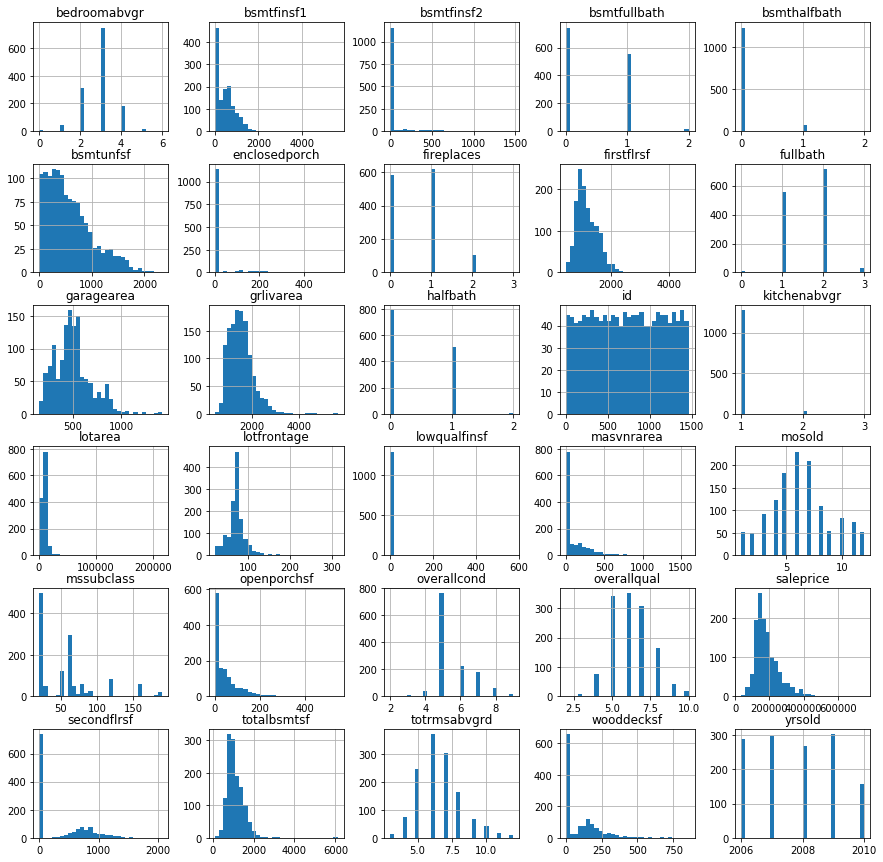

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = house_df.select_dtypes(include=numerics)
numeric_df.hist(bins=30, figsize=(15, 15))
plt.show()

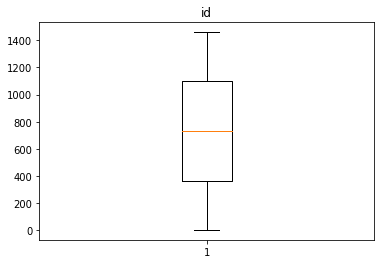

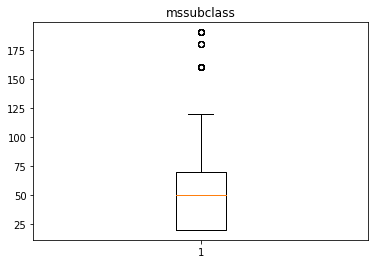

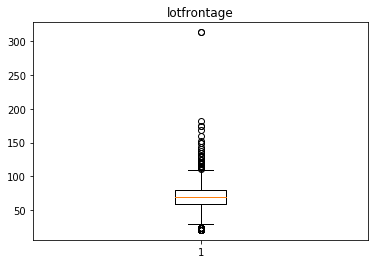

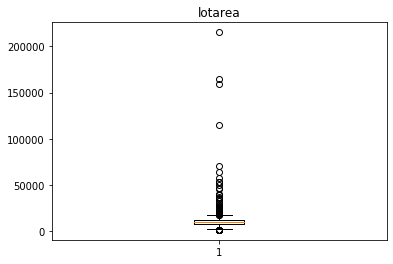

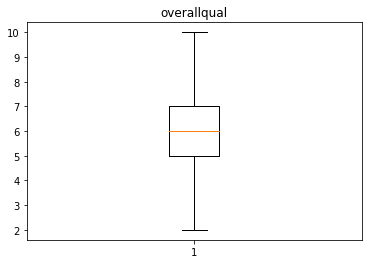

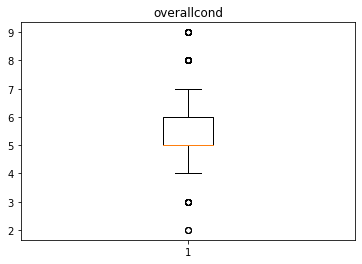

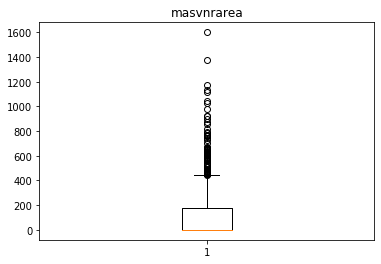

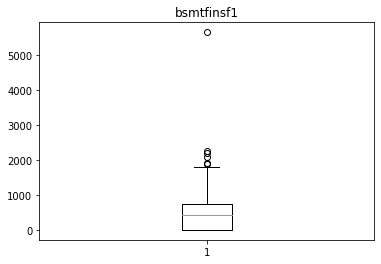

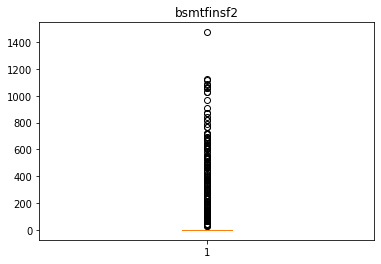

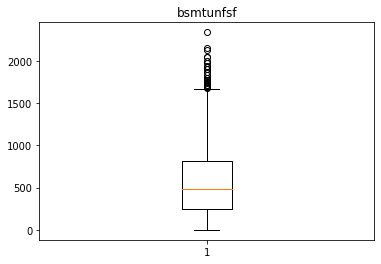

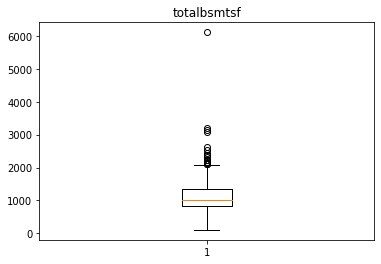

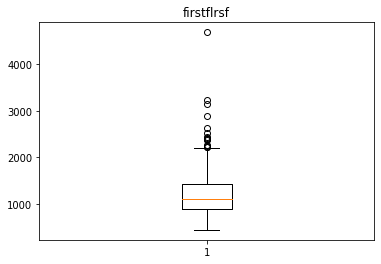

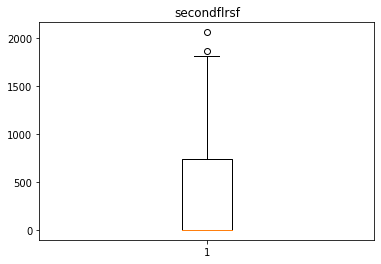

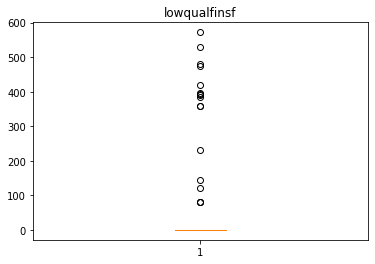

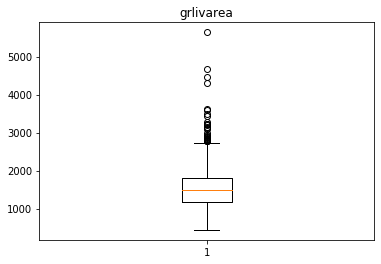

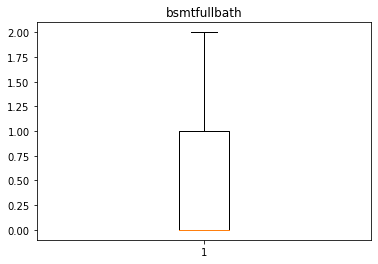

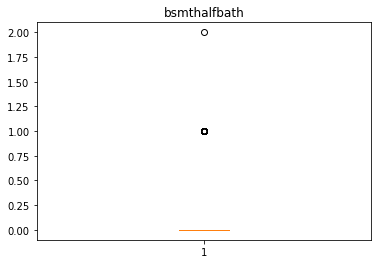

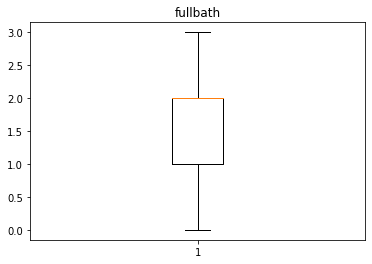

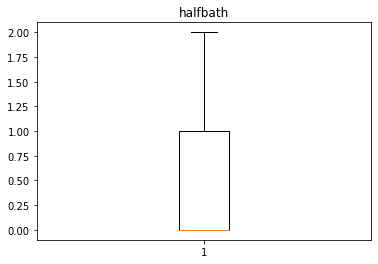

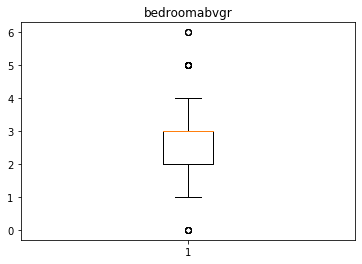

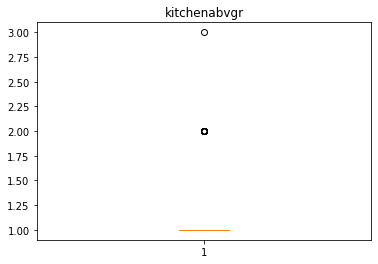

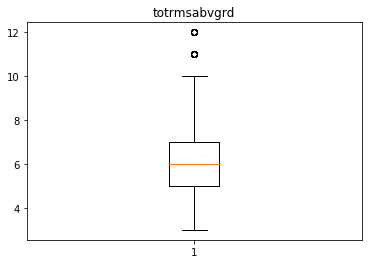

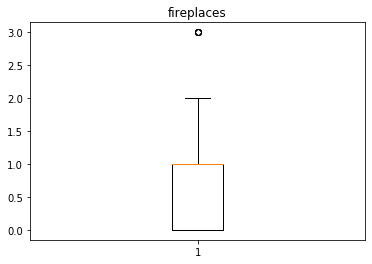

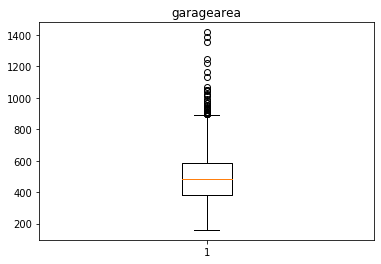

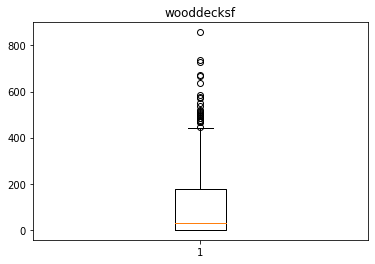

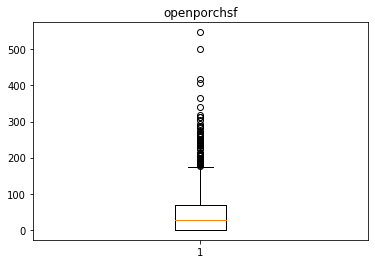

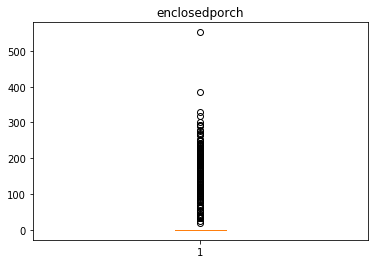

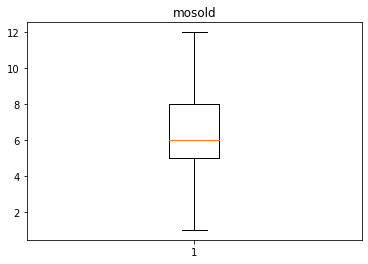

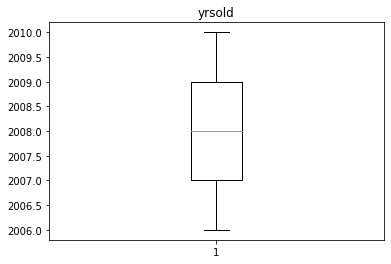

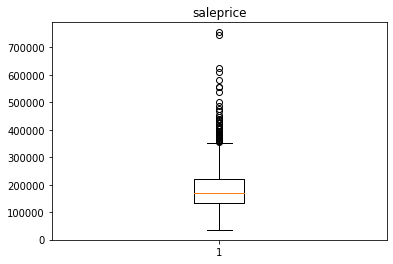

In [22]:
cols = numeric_df.columns
for col in cols:
    plt.boxplot(house_df[col])
    plt.title(col)
    plt.show()

## Winsorize values

In [23]:
for col in cols:
    house_df[col] = winsorize(house_df[col], (0, 0.10))

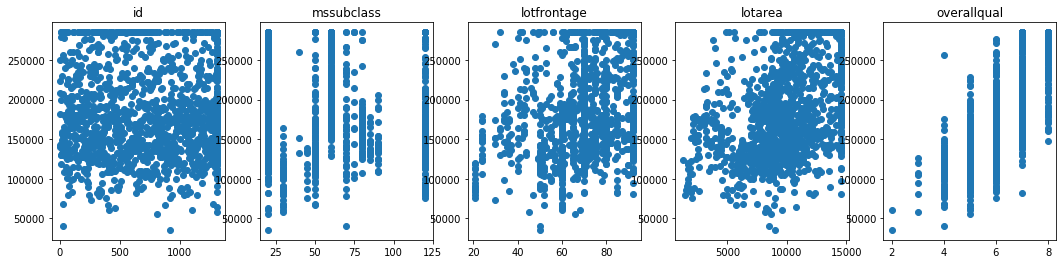

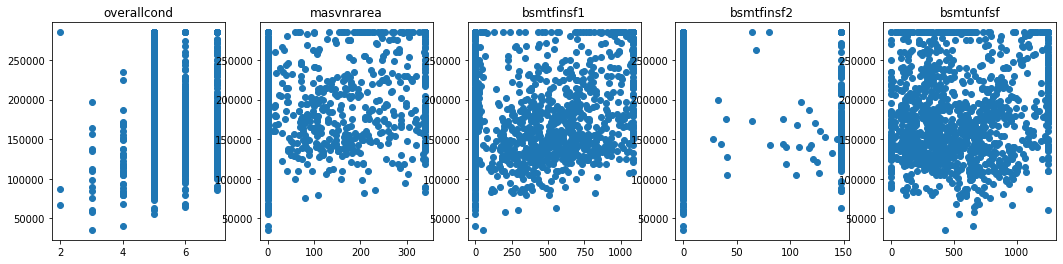

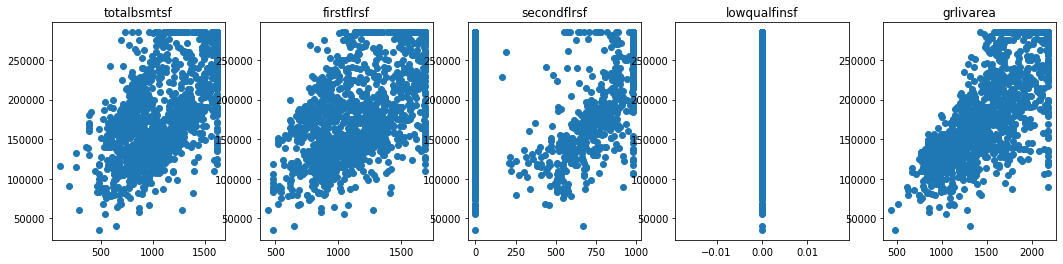

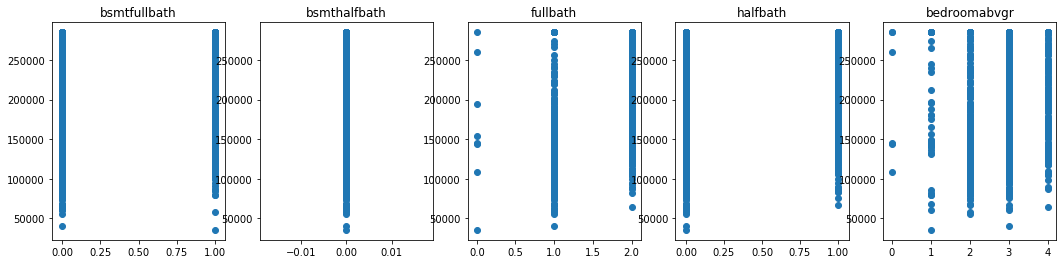

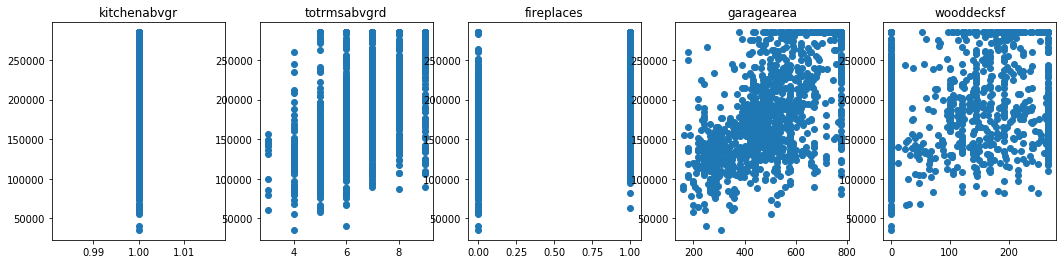

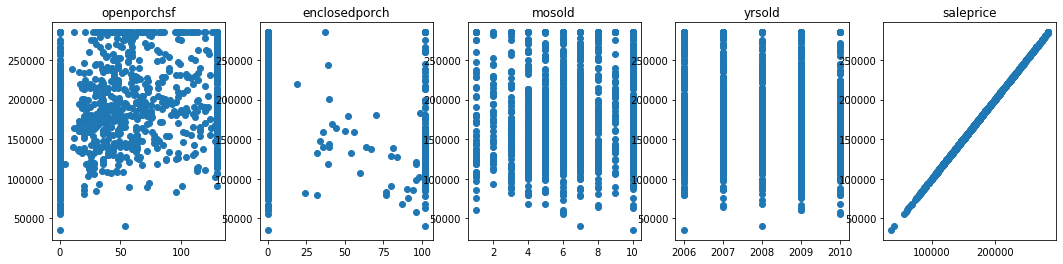

<Figure size 1296x288 with 0 Axes>

In [24]:
x = 1
plt.figure(figsize=(18,4))
for col in cols:
    plt.subplot(1,5,x)
    plt.scatter(house_df[col], house_df["saleprice"])
    plt.title(col)
    
    if (x == 5):
        x = 1
        plt.show()
        plt.figure(figsize=(18,4))
    else:
        x += 1

## Correlation matrix and heat map

In [25]:
corrmat = house_df.corr()
corrmat

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,...,fireplaces,garagearea,wooddecksf,openporchsf,enclosedporch,mosold,yrsold,saleprice,d_central,d_paved
id,1.000000,0.016365,-0.024459,-0.018390,-0.047331,0.004063,-0.042647,-0.006441,-0.004048,-0.014315,...,-0.006108,0.007369,-0.048481,-0.025109,0.003273,0.023927,-0.001576,-0.030009,0.020474,-0.010548
mssubclass,0.016365,1.000000,-0.427902,-0.429176,0.117886,-0.117770,0.037616,-0.061532,-0.077842,-0.115838,...,0.034919,-0.052516,0.017369,0.012554,-0.039888,0.002165,-0.023869,-0.025432,-0.073893,-0.011568
lotfrontage,-0.024459,-0.427902,1.000000,0.620774,0.182926,-0.022315,0.189380,0.126833,0.042425,0.109741,...,0.207180,0.335813,0.096911,0.145116,-0.035866,0.025844,-0.002148,0.359787,0.070808,0.079575
lotarea,-0.018390,-0.429176,0.620774,1.000000,0.187209,-0.004778,0.142414,0.170231,0.068640,0.066857,...,0.298263,0.340972,0.175252,0.152342,-0.025848,-0.000769,-0.031871,0.437730,0.060862,0.007711
overallqual,-0.047331,0.117886,0.182926,0.187209,1.000000,-0.196186,0.376769,0.095580,-0.149838,0.270946,...,0.425596,0.522506,0.236539,0.368673,-0.168197,0.065855,-0.026188,0.800861,0.194516,0.147983
overallcond,0.004063,-0.117770,-0.022315,-0.004778,-0.196186,1.000000,-0.156660,-0.029053,0.092634,-0.166879,...,-0.072845,-0.229871,-0.040868,-0.127495,0.093542,-0.019669,0.043069,-0.123439,0.067602,-0.070702
masvnrarea,-0.042647,0.037616,0.189380,0.142414,0.376769,-0.156660,1.000000,0.207007,-0.087064,0.070966,...,0.254014,0.359375,0.149292,0.191052,-0.146891,0.003185,0.010569,0.408243,0.126233,0.130637
bsmtfinsf1,-0.006441,-0.061532,0.126833,0.170231,0.095580,-0.029053,0.207007,1.000000,-0.010562,-0.641270,...,0.142910,0.225168,0.172936,0.070820,-0.134187,-0.013457,0.023564,0.283026,0.128661,0.168052
bsmtfinsf2,-0.004048,-0.077842,0.042425,0.068640,-0.149838,0.092634,-0.087064,-0.010562,1.000000,-0.288717,...,-0.004049,-0.055756,0.064003,-0.073086,0.049374,-0.032318,0.032642,-0.086428,0.028281,0.039393
bsmtunfsf,-0.014315,-0.115838,0.109741,0.066857,0.270946,-0.166879,0.070966,-0.641270,-0.288717,1.000000,...,0.086449,0.148741,-0.037423,0.129738,0.017108,0.030874,-0.040696,0.176303,-0.018442,-0.070022


In [26]:
house_df = house_df.drop(columns=['lowqualfinsf', 'bsmthalfbath', 'kitchenabvgr'])

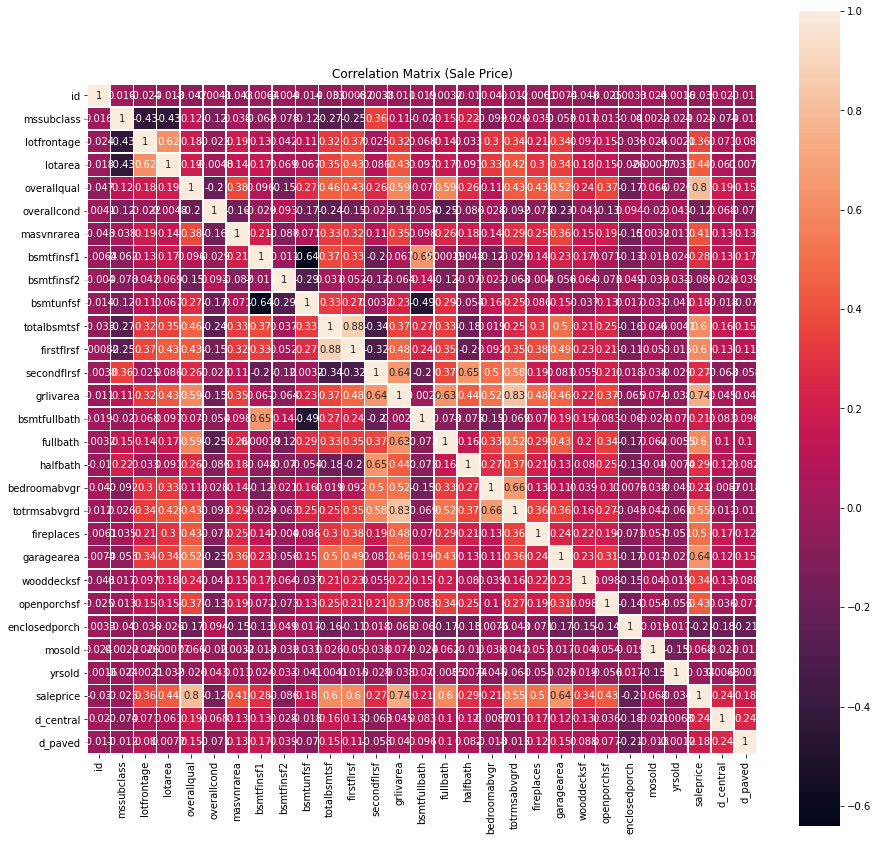

In [27]:
corrmap = house_df.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(corrmap, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix (Sale Price)")

plt.show()

In [28]:
cols

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf',
       'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea',
       'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr',
       'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagearea',
       'wooddecksf', 'openporchsf', 'enclosedporch', 'mosold', 'yrsold',
       'saleprice'],
      dtype='object')

In [29]:
num_cols = ['totalbsmtsf', 'firstflrsf', 'grlivarea', 'garagearea']
cat_cols = ['mssubclass', 'overallqual', 'overallcond', 'fullbath', 'halfbath', 'totrmsabvgrd',
           'fireplaces', 'enclosedporch']

## 3) Now, split your data into train and test sets where 20% of the data resides in the test set.

In [30]:
X = house_df.drop['saleprice']
y = house_df['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

TypeError: 'method' object is not subscriptable

## 4) Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

## 5) Evaluate your best model on the test set.

## 6) So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.